# Zadatak 1
U prilogu vježbe nalazi se funkcija 6.1. koja služi za generiranje umjetnih podataka kako bi se demonstrirala binarna klasifikacija za slučaj dvije ulazne veličine. Funkcija prima cijeli broj koji definira željeni broju uzoraka u skupu, a vraća generirani skup podataka u obliku numpy polja pri čemu su prvi i drugi stupac ulazne veličine, a treći stupac klasa kojoj pojedini uzorak pripada. Pomoću ove funkcije generirajte skup za učenje veličine 200 uzoraka (pri tome koristite postavite seed generatora slučajnih brojeva na 242 pomoću naredbe np.random.seed(242)). Generirajte i skup za testiranje veličine 100 uzoraka uzoraka (pri tome koristite postavite seed generatora slučajnih brojeva na 242 pomoću naredbe np.random.seed(12)). Uključite numpy biblioteku.

In [119]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [120]:
np.random.seed(242)

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1))
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1))
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2)
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


In [121]:
train_data = generate_data(200)
test_data = generate_data(100)

# Zadatak 2

Prikažite generirane podatke za učenje pomoću matplotlib biblioteke u ravnini 𝑥1 − 𝑥2. Kako bi se dvije klase razlikovale, potrebno ih je obojati drugom bojom. Za ovaj zadatak vam može poslužiti naredba scatter koja osim podataka prima i parametre c i cmap kojima je moguće definirati boju svake klase.

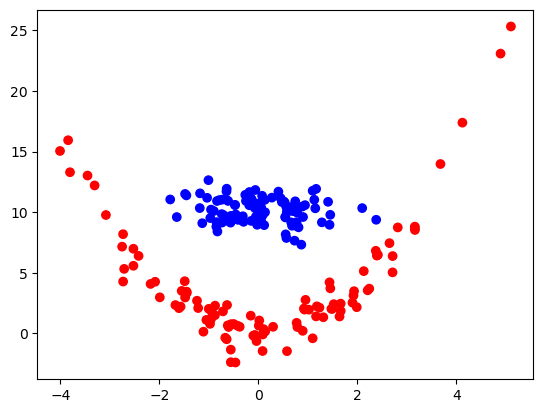

In [122]:
colors = ["red", "blue"]
plt.scatter(train_data[:,0], train_data[:,1], c=train_data[:,2], cmap=matplotlib.colors.ListedColormap(colors))

# Zadatak 3

Izgradite model logističke regresije pomoću scikit-learn biblioteke na temelju generiranih podataka za učenje. Koristite metodu LogisticRegression() iz biblioteke sklearn.linear_model. Kao i sve metode strojnog učenja unutar ove biblioteke, objekt klase logistička regresija ima na raspolaganju metode fit (određivanje parametara modela 𝛉) i predict (klasifikacija uzoraka na temelju vrijednosti ulaznih veličina). Izgrađeni model sadrži parametre 𝛉 u varijablama intercept_ i coef_. Prikažite granicu odluke naučenog modela ravnini 𝑥1 − 𝑥2 zajedno s podacima za učenje. Što
primjećujete?

Napomena: granica odluke u ravnini 𝑥1 − 𝑥2 definirana je kao krivulja: 𝜃0 + 𝜃1𝑥1 + 𝜃1𝑥2 = 0

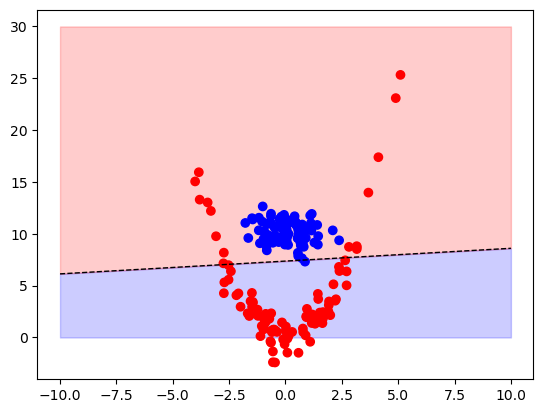

In [123]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data[:,:2],train_data[:,2])

theta0 = model.intercept_
theta1, theta2 = model.coef_.T

a=-theta1/theta2
b=-theta0/theta2

xmin, xmax = -10, 10
ymin, ymax = 0, 30
xd = np.array([xmin, xmax])
yd = a*xd + b
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='red', alpha=0.2)

plt.scatter(train_data[:,0], train_data[:,1], c=train_data[:,2], cmap=matplotlib.colors.ListedColormap(colors))

# Zadatak 4

U prilogu vježbe nalazi se kod 6.2. koji će obojati sliku s obzirom na izlaz modela logističke regresije u obliku vjerojatnosti (6-6). Iskoristite ovaj kod kako biste prikazali izlaz logističke regresije u obliku vjerojatnosti zajedno s podacima za učenje.

Napomena: objekt naziva LogRegModel u kodu je model logističke regresije te ga zamijenite s odgovarajućim imenom vašeg modela.

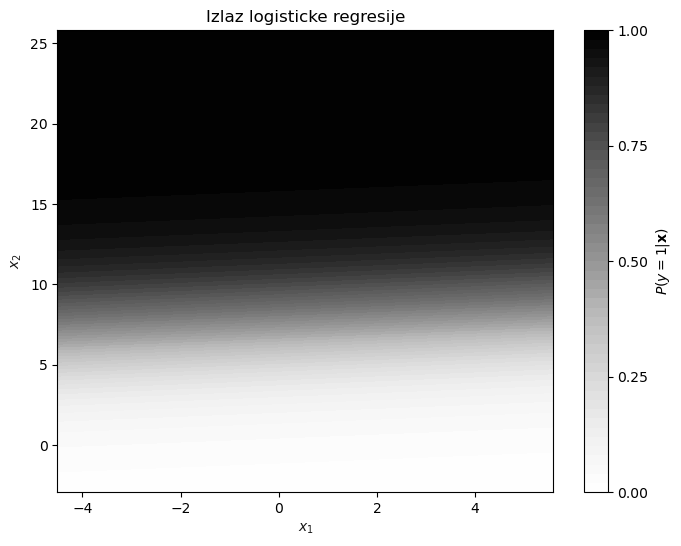

In [124]:
data_train = train_data
data_test = test_data

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data_train[:,0])-0.5:max(data_train[:,0])+0.5:.05,
                          min(data_train[:,1])-0.5:max(data_train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


# Zadatak 5

Provedite klasifikaciju testnog skupa podataka pomoću izgrađenog modela logističke regresije i metode predict. Prikažite skup za testiranje u ravnini 𝑥1 − 𝑥2. Zelenom bojom označite dobro klasificirane uzorke dok pogrešno klasificirane uzorke označite crnom bojom.

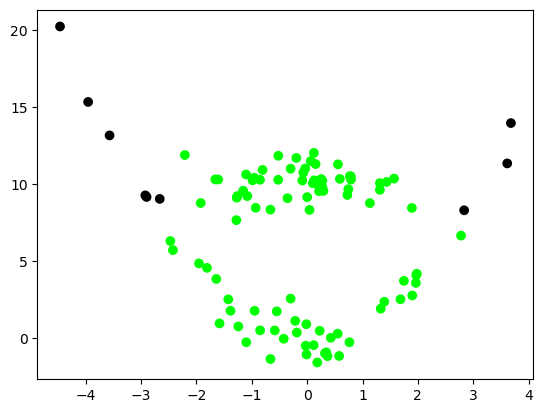

In [125]:
colors=["black", (0,1,0)]
y=model.predict(data_test[:,:2])
plt.scatter(data_test[:,0], data_test[:,1],c=(data_test[:,2]==y),cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

# Zadatak 6

Funkcija 6.3. u dodatku prima izračunatu matricu zabune pri čemu se klase označavaju brojevima 0-9. Prikažite pomoću ove funkcije matricu zabune izgrađenog modela logističke regresije na testnim podacima. Matricu zabune moguće je izračunati naredbom confusion_matrix koja se nalazi u sklearn.metrics. 

Izračunajte i pokazatelje dane izrazima (6-10) (napišite vlastitu funkciju ili koristite gotove iz sklearn.metrics).

In [126]:
from sklearn import metrics

In [127]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

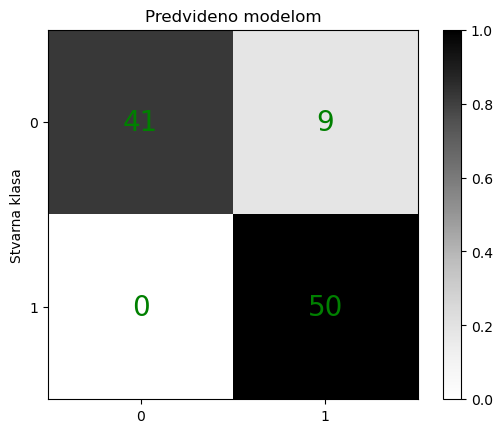

Accuracy: 0.91
Precision: 0.847457627118644
Recall: 1.0
Specificity: 0.82


In [128]:
matrix = metrics.confusion_matrix(data_test[:,2], y)
accuracy = metrics.accuracy_score(data_test[:,2], y)
precision = metrics.precision_score(data_test[:,2], y)
recall = metrics.recall_score(data_test[:,2], y)
specificity = metrics.recall_score(data_test[:,2], y, pos_label=0)

plot_confusion_matrix(matrix)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)


# Zadatak 7

Ponovite zadatke 3,4,5,6 za slučaj kada se u model logističke regresije proširuje s dodatnim ulaznim veličinama koje su polinomska transformacija postojećih. Prošireni skup ulaznih veličina (data_train_new) veličine moguće je dobiti iz osnovnog skupa za učenje (data_train) naredbama:

```
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias = False)
data_train_new = poly.fit_transform(data_train[:,0:2])
```

pri čemu je degree cijeli broj koji označava do kojeg reda će se raditi proširenje skupa. Npr. za degree = 2 prošireni skup ima uzorke oblika (6-8). Što primjećujete? Kako komentirate dobivene rezultate? Što se događa kada mijenjate degree od malih prema većim vrijednostima?

In [129]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
from sklearn import preprocessing

data_train = generate_data(200)
data_test = generate_data(100)

poly = PolynomialFeatures(degree=3, include_bias = False)
data_train_new = poly.fit_transform(data_train[:,0:2])
data_test_new = poly.fit_transform(data_test[:,0:2])

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(data_train_new[:,1:2])

# print(np.array([encoded]).shape)
# 
# data_train_new[:,1:2] = np.array([encoded]).reshape((-1, 1))

In [130]:

# model = lm.LogisticRegression()

# model.fit(data_train_new[:,0:2],data_train_new[:,2])

# theta0 = model.intercept_
# theta1, theta2 = model.coef_.T

# a=-theta1/theta2
# b=-theta0/theta2

# xmin, xmax = -10, 10
# ymin, ymax = 0, 30
# xd = np.array([xmin, xmax])
# yd = a*xd + b
# plt.plot(xd, yd, 'k', lw=1, ls='--')
# plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
# plt.fill_between(xd, yd, ymax, color='red', alpha=0.2)

# plt.scatter(train_data[:,0], train_data[:,1], c=train_data[:,2], cmap=matplotlib.colors.ListedColormap(colors))

# Zadatak 8

Na temelju podataka za učenje izgradite model metodom K najbližih susjeda. Ulazne veličine je potrebno standardizirati prije postupka učenja modela naredbom `preprocessing.scale(X)` gdje je matrica X matrica ulaznih veličina (učitajte naredbu pomoću `from sklearn import preprocessing`). Granicu odluke ovog modela prikažite pomoću funkcije 6.4. iz dodatka koja za argumente ima model K najbližih susjeda, matricu ulaznih veličina i vektor izlazne veličine. Što primjećujete? Kako se granica mijenja ako se broj susjeda povećava/smanjuje? Što se događa ako isključite standardizaciju podataka? Prikažite matricu zabune izgrađenog modela na testnim podacima

In [131]:
from sklearn.neighbors import KNeighborsClassifier

/home/dbertic/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/dbertic/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

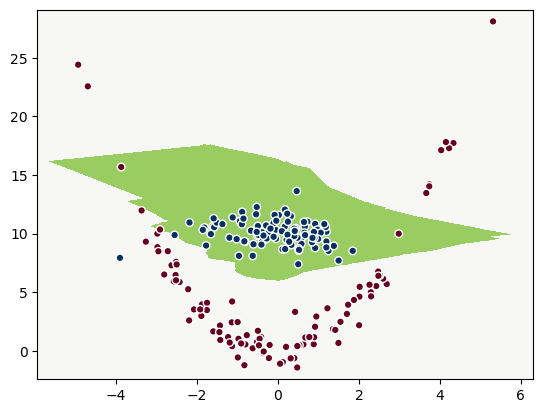

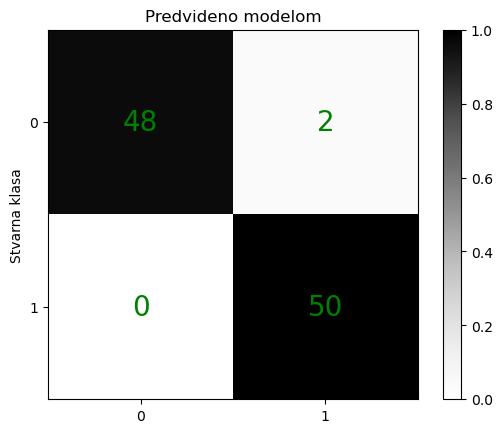

In [132]:
def plot_KNN(KNN_model, X, y):

 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
 np.arange(x2_min, x2_max, 0.01))

 Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z1.reshape(xx.shape)
 plt.figure()
 plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
 plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu', edgecolor='white', label = 'train')


data_train = generate_data(200)
data_test = generate_data(100)

knn = KNeighborsClassifier(5)
knn.fit(data_train[:, 0:2], data_train[:,2])

predictions = knn.predict(data_test[:, 0:2])

plot_KNN(knn, data_train[:, 0:2], data_train[:,2])
plot_confusion_matrix(metrics.confusion_matrix(data_test[:,2], predictions))
